# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Connor Higgins

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test Normality for the distributions of **price** and **log price** <br/>
Use both a graphical method and a formal test. Hint: Remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a Normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable & use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Preparing DataFrame

In [1]:
# Import libraries
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
sns.set()

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [3]:
df = pd.read_csv(fileName)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Cleaning numeric data
df = df.replace({'?' : np.nan}) # replacing ? with nan

for i in df.columns: # converting all numeric-like columns into numeric
    try:
        df[i] = pd.to_numeric(df[i]) 
    except ValueError:
        pass

numcols = df.describe().columns # obtaining all numeric columns

for i in numcols: # filling missing values with mean of column
    df[i] = df[i].fillna((df[i].mean())) 
    
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Task 1. Compare and test the Normality of the distributions of **price** and **log price** <br/>

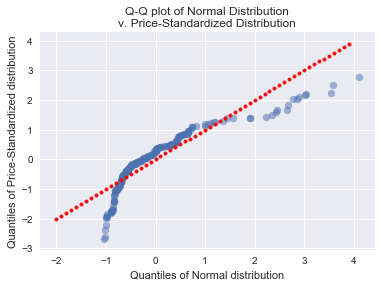

Statistics for Price-Standardized Distribution v. Normal Distribution
## KS-statistic = 0.15138273404223684
## P-value = 0.00014447085551050343


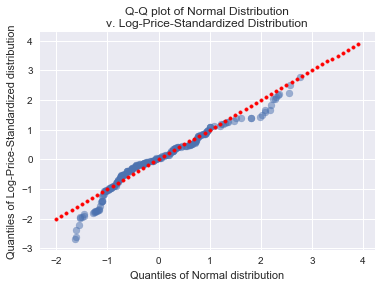

Statistics for Log-Price-Standardized Distribution v. Normal Distribution
## KS-statistic = 0.0920981305795639
## P-value = 0.05791234087855868


In [5]:
# Creating log price
df['log-price'] = df['price'].apply(lambda x : np.log(x))

# Standardizing price and log-price
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()
df['price-standardized'] = standardize.fit_transform(df['price'].values.reshape(-1, 1))
df['log-price-standardized'] = standardize.fit_transform(df['log-price'].values.reshape(-1, 1))

# Creating a normal distribution the size of the total number of entries
normaldist = np.random.normal(size=len(df))


# Plotting 'Normal Distribution against Price-Standardized'
plt.scatter(x = sorted(df['price-standardized']),
            y = sorted(normaldist), alpha=0.5)
plt.scatter(x = np.arange(-2, 4, 0.1),
            y = np.arange(-2, 4, 0.1), color='r', marker='.')
plt.xlabel('Quantiles of Normal distribution')
plt.ylabel('Quantiles of Price-Standardized distribution')
plt.title('Q-Q plot of Normal Distribution\nv. Price-Standardized Distribution')
plt.show()

# Obtaining K-S statistic and P-value for 'price-standardized'
ks_statisic, pvalue = ss.kstest(df['price-standardized'], 'norm')
print('Statistics for Price-Standardized Distribution v. Normal Distribution')
print(f'## KS-statistic = {ks_statisic}')
print(f'## P-value = {pvalue}')


# Plotting 'Normal Distribution against Price-Standardized'
plt.scatter(x = sorted(df['log-price-standardized']),
            y = sorted(normaldist), alpha=0.5)
plt.scatter(x = np.arange(-2, 4, 0.1),
            y = np.arange(-2, 4, 0.1), color='r', marker='.')
plt.xlabel('Quantiles of Normal distribution')
plt.ylabel('Quantiles of Log-Price-Standardized distribution')
plt.title('Q-Q plot of Normal Distribution\nv. Log-Price-Standardized Distribution')
plt.show()

# Obtaining K-S statistic and P-value for 'log-price-standardized'
ks_statisic, pvalue = ss.kstest(df['log-price-standardized'], 'norm')
print('Statistics for Log-Price-Standardized Distribution v. Normal Distribution')
print(f'## KS-statistic = {ks_statisic}')
print(f'## P-value = {pvalue}')

Overall, Log-Price more closely follows a normal distribution when compared to Price. This especially the case within the standard deviation interval of -1 to 1.

### Task 2. Test significance of **price (or log price)** stratified by  a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. 

#### Defining Functions

In [6]:
def stratify_maxsamp(df, group=df.columns[0]):
    
    """Based on stratify, though it always obtains the max number of samples.
        It also allows one to name the groupby"""
    
    groups = df.groupby(group)
    nums = min(groups.size())
    return(groups.apply(lambda x: x.sample(n=nums)))

def double_distplot(array1, label1, array2, label2):
    
    """Plots two displots based on given arrays and array labels"""
    
    samples = len(array1)
    sns.distplot(array1, color='r', label=label1)
    sns.distplot(array2, color='b', label=label2)
    plt.legend()
    plt.title(f'Log-Price Distributions for {samples} Samples \n of {label1} and {label2} cars')
    plt.show()

#### 2.A Fuel Type

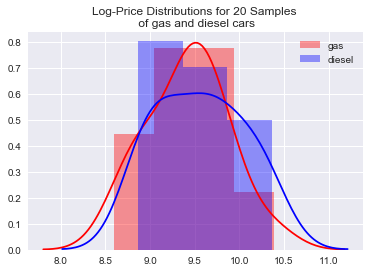

Statistics for T-Test between Diesel and Gas Car Log-Price Samples
## T-test statistic = -0.9515706216748053
## P-value = 0.34732841706637063


In [7]:
fuel_sample = stratify_maxsamp(df, 'fuel-type') # obtaining maximum number of samples from each fuel-type.

gas_logprice = np.array(fuel_sample.loc[fuel_sample['fuel-type'] == 'gas', 'log-price']) # log-price array for gas fuel-type
diesel_logprice = np.array(fuel_sample.loc[fuel_sample['fuel-type'] == 'diesel', 'log-price']) # log-price array for diesel fuel-type

double_distplot(gas_logprice, 'gas', diesel_logprice, 'diesel')

tstat, pvalue = ss.ttest_ind(gas_logprice, diesel_logprice)

print('Statistics for T-Test between Diesel and Gas Car Log-Price Samples')
print(f'## T-test statistic = {tstat}')
print(f'## P-value = {pvalue}')

Gas cars tend to be cheaper with a narrower price range, whereas diesel cars can vary considerably in terms of price. There is, however, no significant difference between the two groups.

#### 2.B Aspiration

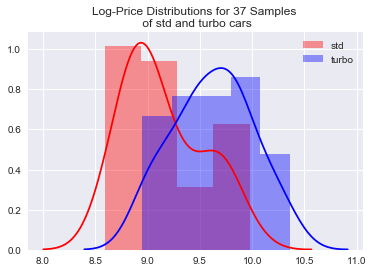

Statistics for T-Test between Std and Turbo Car Log-Price Samples
## T-test statistic = -5.342389639834163
## P-value = 1.0257799447752807e-06


In [8]:
aspiration_sample = stratify_maxsamp(df, 'aspiration')

std_logprice = np.array(aspiration_sample.loc[aspiration_sample['aspiration'] == 'std', 'log-price'])
turbo_logprice = np.array(aspiration_sample.loc[aspiration_sample['aspiration'] == 'turbo', 'log-price'])

double_distplot(std_logprice, 'std', turbo_logprice, 'turbo')

tstat, pvalue = ss.ttest_ind(std_logprice, turbo_logprice)

print('Statistics for T-Test between Std and Turbo Car Log-Price Samples')
print(f'## T-test statistic = {tstat}')
print(f'## P-value = {pvalue}')

While there is substantial overlap in log-price distribution, cars with turbo aspiration tend to be more expensive.

#### 2.C Rear vs. Front Wheel Drive

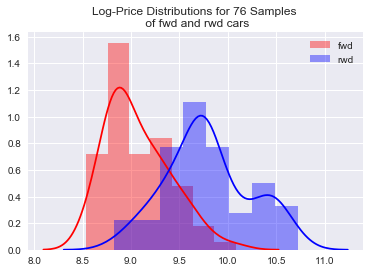

Statistics for T-test between fwd and rwd Car Log-Price Samples
## T-test statistic = -11.500217536724904
## P-value = 2.417258220153449e-22


In [9]:
df_rearfront = df[df['drive-wheels'] != '4wd']
wheeldrive_sample = stratify_maxsamp(df_rearfront, 'drive-wheels')

fwd_logprice = np.array(wheeldrive_sample.loc[wheeldrive_sample['drive-wheels'] == 'fwd', 'log-price'])
rwd_logprice = np.array(wheeldrive_sample.loc[wheeldrive_sample['drive-wheels'] == 'rwd', 'log-price'])

double_distplot(fwd_logprice, 'fwd', rwd_logprice, 'rwd')

tstat, pvalue = ss.ttest_ind(fwd_logprice, rwd_logprice)

print('Statistics for T-test between fwd and rwd Car Log-Price Samples')
print(f'## T-test statistic = {tstat}')
print(f'## P-value = {pvalue}')

Front-wheel drive and rear-wheel-drive cars have significantly different distributions, with fwd cars being far cheaper than their rwd counterparts.

### Task 3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a Normal distribution) of autos stratified by **body style**.

#### 3.A Sampling and Plotting Body Style Distributions

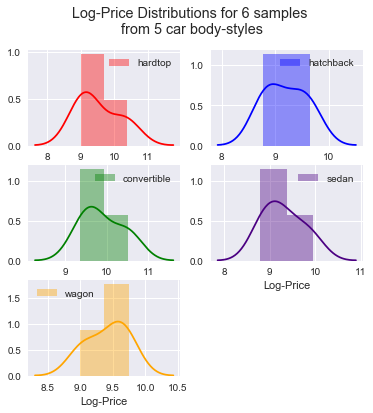

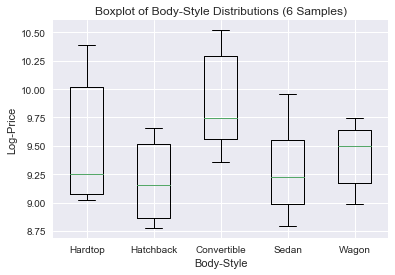

In [10]:
# Obtaining maximum number of samples per body style
bodystyle_sample = stratify_maxsamp(df, 'body-style')

hardtop_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'hardtop', 'log-price'])
hatchback_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'hatchback', 'log-price'])
convertible_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'convertible', 'log-price'])
sedan_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'sedan', 'log-price'])
wagon_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'wagon', 'log-price'])

# Plotting 5 car 'body-style' sample distributions
plt.figure(figsize=(6,6)).gca()
ax1 = plt.subplot(321)
sns.distplot(hardtop_logprice, color='red', label='hardtop', ax=ax1)
plt.legend()

ax2 = plt.subplot(322)
sns.distplot(hatchback_logprice, color='blue', label='hatchback', ax=ax2)
plt.legend()

ax3 = plt.subplot(323)
sns.distplot(convertible_logprice, color='green', label='convertible', ax=ax3)
plt.legend()

ax4 = plt.subplot(324)
sns.distplot(sedan_logprice, color='indigo', label='sedan', ax=ax4)
plt.legend()
plt.xlabel('Log-Price')

ax5 = plt.subplot(325)
sns.distplot(wagon_logprice, color='orange', label='wagon', ax=ax5)
plt.legend()
plt.xlabel('Log-Price')

plt.suptitle('Log-Price Distributions for 6 samples\n from 5 car body-styles')
plt.show()

# Plotting Summary Boxplot
plt.boxplot([hardtop_logprice, hatchback_logprice,
             convertible_logprice, sedan_logprice,
             wagon_logprice])
plt.ylabel('Log-Price')
plt.xlabel('Body-Style')
plt.xticks([1, 2, 3, 4, 5], ['Hardtop', 'Hatchback', 'Convertible', 'Sedan', 'Wagon'])
plt.title('Boxplot of Body-Style Distributions (6 Samples)')
plt.show()

Cars with a Hatchback body-style tend to be cheaper than other body styles.

#### 3.B Applying ANOVA and Tukey HSD test

In [11]:
# Obtaining f-stat and p-value
f_stat, p_value = ss.f_oneway(hardtop_logprice, hatchback_logprice,
                               convertible_logprice, sedan_logprice,
                               wagon_logprice)

print('\nStatistics for F-Test between 5 Car Body-Styles (6 Samples)')
print(f'## F-test statistic = {f_stat}')
print(f'## P-value = {p_value}\n')

# Obtaining pairwise_tukeyhsd table
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_tukey = pd.DataFrame({'vals' : list(hardtop_logprice) + list(hatchback_logprice)
                                + list(convertible_logprice) + list(sedan_logprice) + list(wagon_logprice),
                         'group': ['Hardtop'] * 6 + ['Hatchback'] * 6 + ['Convertible'] * 6 + ['Sedan'] * 6 + ['Wagon'] * 6})

Tukey_HSD = pairwise_tukeyhsd(df_tukey.vals, df_tukey.group)
print(Tukey_HSD)


Statistics for F-Test between 5 Car Body-Styles (6 Samples)
## F-test statistic = 2.0572628253764424
## P-value = 0.1168398792079986

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1     group2  meandiff  lower  upper  reject
----------------------------------------------------
Convertible  Hardtop  -0.3584  -1.1411 0.4243 False 
Convertible Hatchback  -0.699  -1.4817 0.0837 False 
Convertible   Sedan   -0.5966  -1.3794 0.1861 False 
Convertible   Wagon   -0.4761  -1.2588 0.3066 False 
  Hardtop   Hatchback -0.3406  -1.1234 0.4421 False 
  Hardtop     Sedan   -0.2383   -1.021 0.5445 False 
  Hardtop     Wagon   -0.1177  -0.9005 0.665  False 
 Hatchback    Sedan    0.1024  -0.6803 0.8851 False 
 Hatchback    Wagon    0.2229  -0.5598 1.0056 False 
   Sedan      Wagon    0.1205  -0.6622 0.9032 False 
----------------------------------------------------


Significant differences were found between the log-price distributions of Covertible v. Hatchback and Hardtop v. Hatchback groups.

#### 3.C Applying ANOVA and Tukey HSD test on top three categories
Sedan, Hatchback, and Wagon have 96, 70, and 25 counts respectively, while Hardtop and Convertible body-style groups have just 8 and 6 counts respectively. Dropping the latter two will increase the power of our tests, due in part to our ability to sample up to 25 entries rather than merely 6.

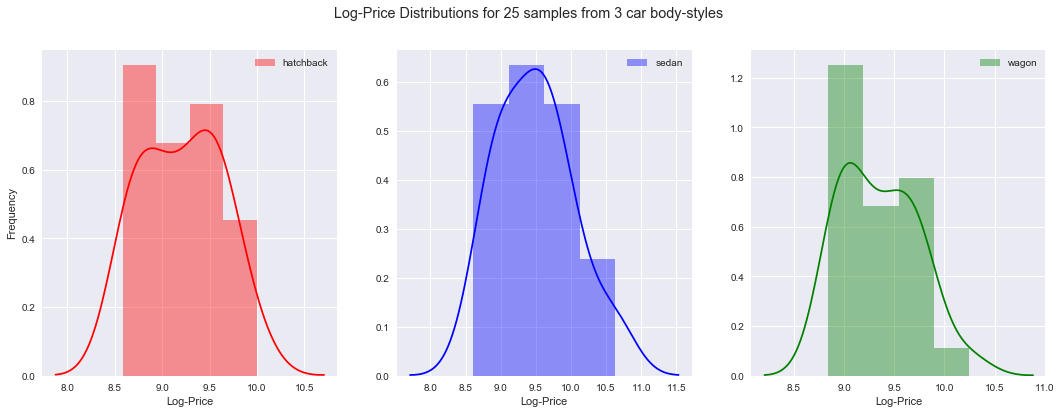

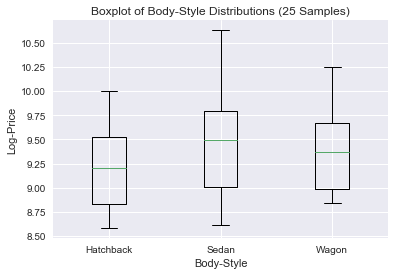


Statistics for F-Test between 3 Car Body-Styles (25 Samples)
## F-test statistic = 2.46296244619613
## P-value = 0.09233188798935103

Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1  group2 meandiff  lower  upper  reject
-----------------------------------------------
Hatchback Sedan   0.2845  -0.0223 0.5914 False 
Hatchback Wagon   0.1475  -0.1593 0.4544 False 
  Sedan   Wagon   -0.137  -0.4438 0.1699 False 
-----------------------------------------------


In [12]:
# Dropping convertible and hardtop body-styles
df_bodystyle = df[(df['body-style'] != 'convertible') & (df['body-style'] != 'hardtop')]

# Obtaining log price columns for 25 samples from top 3 body-styles
bodystyle_sample = stratify_maxsamp(df_bodystyle, 'body-style')

hatchback_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'hatchback', 'log-price'])
sedan_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'sedan', 'log-price'])
wagon_logprice = np.array(bodystyle_sample.loc[bodystyle_sample['body-style'] == 'wagon', 'log-price'])


# Plotting 3 car 'body-style' sample distributions
plt.figure(figsize=(18,6)).gca()
ax1 = plt.subplot(131)
sns.distplot(hatchback_logprice, color='red', label='hatchback', ax=ax1)
plt.ylabel('Frequency')
plt.xlabel('Log-Price')
plt.legend()

ax2 = plt.subplot(132)
sns.distplot(sedan_logprice, color='blue', label='sedan', ax=ax2)
plt.xlabel('Log-Price')
plt.legend()

ax3 = plt.subplot(133)
sns.distplot(wagon_logprice, color='green', label='wagon', ax=ax3)
plt.xlabel('Log-Price')
plt.legend()

plt.suptitle('Log-Price Distributions for 25 samples from 3 car body-styles')
plt.show()

# Plotting Summary Boxplot
plt.boxplot([hatchback_logprice, sedan_logprice, wagon_logprice])
plt.ylabel('Log-Price')
plt.xlabel('Body-Style')
plt.xticks([1, 2, 3], ['Hatchback', 'Sedan', 'Wagon'])
plt.title('Boxplot of Body-Style Distributions (25 Samples)')
plt.show()


# Obtaining f-stat and p-value
f_stat, p_value = ss.f_oneway(hatchback_logprice, sedan_logprice, wagon_logprice)

print('\nStatistics for F-Test between 3 Car Body-Styles (25 Samples)')
print(f'## F-test statistic = {f_stat}')
print(f'## P-value = {p_value}\n')


# Obtaining pairwise_tukeyhsd table
df_tukey = pd.DataFrame({'vals' : list(hatchback_logprice) + list(sedan_logprice) + list(wagon_logprice),
                         'group': ['Hatchback'] * 25 + ['Sedan'] * 25 + ['Wagon'] * 25})

Tukey_HSD = pairwise_tukeyhsd(df_tukey.vals, df_tukey.group)
print(Tukey_HSD)

No significant differences were found between Hatchback, Sedan, and Wagon log-price distributions.

### Task 4. Graphically explore the differences between the price conditioned by the categories of each variable & use standard ANOVA and Tukey HSD to test the differences of these groups.

#### 4.A Symboling

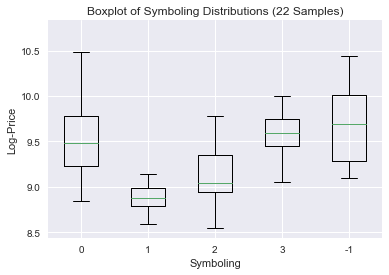


Statistics for F-Test between 5 Car Symbolings (22 Samples)
## F-test statistic = 11.213240373452173
## P-value = 1.297439784822497e-07

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  -1     0    -0.1223  -0.4804  0.2358 False 
  -1     1    -0.6641  -1.0222  -0.306  True 
  -1     2    -0.5126  -0.8707 -0.1546  True 
  -1     3    -0.0159   -0.374  0.3422 False 
  0      1    -0.5418  -0.8998 -0.1837  True 
  0      2    -0.3903  -0.7484 -0.0322  True 
  0      3     0.1064  -0.2517  0.4645 False 
  1      2     0.1514  -0.2066  0.5095 False 
  1      3     0.6482   0.2901  1.0062  True 
  2      3     0.4967   0.1386  0.8548  True 
---------------------------------------------


In [13]:
# Dropping categories with too few samples
df_symboling = df[df['symboling'] != -2]

# Obtaining log price columns for the maximum # of samples
symboling_sample = stratify_maxsamp(df_symboling, 'symboling')

symboling_0_logprice = np.array(symboling_sample.loc[symboling_sample['symboling'] == 0, 'log-price'])
symboling_1_logprice = np.array(symboling_sample.loc[symboling_sample['symboling'] == 1, 'log-price'])
symboling_2_logprice = np.array(symboling_sample.loc[symboling_sample['symboling'] == 2, 'log-price'])
symboling_3_logprice = np.array(symboling_sample.loc[symboling_sample['symboling'] == 3, 'log-price'])
symboling_n1_logprice = np.array(symboling_sample.loc[symboling_sample['symboling'] == -1, 'log-price'])

# Plotting Summary Boxplot
plt.boxplot([symboling_0_logprice, symboling_1_logprice, symboling_2_logprice, symboling_3_logprice, symboling_n1_logprice])
plt.ylabel('Log-Price')
plt.xlabel('Symboling')
plt.xticks([1, 2, 3, 4, 5], ['0', '1', '2', '3', '-1'])
plt.title('Boxplot of Symboling Distributions (22 Samples)')
plt.show()


# Obtaining f-stat and p-value
f_stat, p_value = ss.f_oneway(symboling_0_logprice, symboling_1_logprice,
                              symboling_2_logprice, symboling_3_logprice, symboling_n1_logprice)

print('\nStatistics for F-Test between 5 Car Symbolings (22 Samples)')
print(f'## F-test statistic = {f_stat}')
print(f'## P-value = {p_value}\n')


# Obtaining pairwise_tukeyhsd table
df_tukey = pd.DataFrame({'vals' : list(symboling_0_logprice) + list(symboling_1_logprice) +
                         list(symboling_2_logprice) + list(symboling_3_logprice) + list(symboling_n1_logprice),
                         'group': ['0'] * 22 + ['1'] * 22 + ['2'] * 22 + ['3'] * 22 + ['-1'] * 22})

Tukey_HSD = pairwise_tukeyhsd(df_tukey.vals, df_tukey.group)
print(Tukey_HSD)

Significant differences were found between the log-price distributions of -1 v. 1, -1 v. 2, 0 v. 1, 1 v. 3, and 2 v. 3 symboling groups. As symboling is used to assess a vehicles insurance risk in actuarial science, the variety of log-price distributions is intuitive.

#### 4.B Make

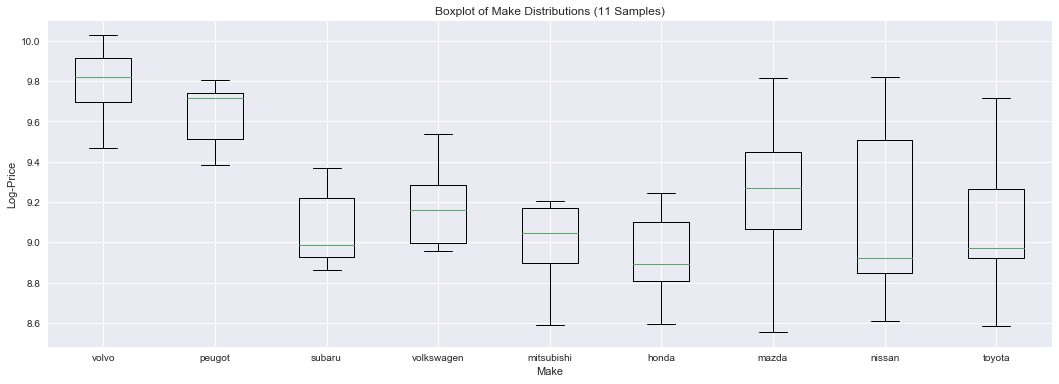


Statistics for F-Test between 9 Car Makes (11 Samples)
## F-test statistic = 11.118403205626233
## P-value = 8.402151203115459e-11

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
  honda      mazda     0.3037  -0.0736  0.6809 False 
  honda    mitsubishi  0.128   -0.2493  0.5053 False 
  honda      nissan    0.192   -0.1852  0.5693 False 
  honda      peugot    0.6889   0.3116  1.0662  True 
  honda      subaru    0.1236  -0.2537  0.5008 False 
  honda      toyota    0.1624  -0.2148  0.5397 False 
  honda    volkswagen  0.2216  -0.1557  0.5989 False 
  honda      volvo     0.8368   0.4595  1.2141  True 
  mazda    mitsubishi -0.1756  -0.5529  0.2017 False 
  mazda      nissan   -0.1116  -0.4889  0.2657 False 
  mazda      peugot    0.3852   0.0079  0.7625  True 
  mazda      subaru   -0.1801  -0.5574  0.1972 False 
  mazda      toyota   -0.1412  -0.5185  0.2361 False 
  m

In [14]:
# Dropping categories with too few samples
df_make = df[(df['make'] == 'volvo') | (df['make'] == 'peugot') | (df['make'] == 'subaru') | (df['make'] == 'volkswagen')
            | (df['make'] == 'mitsubishi') | (df['make'] == 'honda') | (df['make'] == 'mazda') | (df['make'] == 'nissan')
            | (df['make'] == 'toyota')]

# Obtaining log price columns for the maximum # of samples
make_sample = stratify_maxsamp(df_make, 'make')

make_volvo_logprice = np.array(make_sample.loc[make_sample['make'] == 'volvo', 'log-price'])
make_peugot_logprice = np.array(make_sample.loc[make_sample['make'] == 'peugot', 'log-price'])
make_subaru_logprice = np.array(make_sample.loc[make_sample['make'] == 'subaru', 'log-price'])
make_volkswagen_logprice = np.array(make_sample.loc[make_sample['make'] == 'volkswagen', 'log-price'])
make_mitsubishi_logprice = np.array(make_sample.loc[make_sample['make'] == 'mitsubishi', 'log-price'])
make_honda_logprice = np.array(make_sample.loc[make_sample['make'] == 'honda', 'log-price'])
make_mazda_logprice = np.array(make_sample.loc[make_sample['make'] == 'mazda', 'log-price'])
make_nissan_logprice = np.array(make_sample.loc[make_sample['make'] == 'nissan', 'log-price'])
make_toyota_logprice = np.array(make_sample.loc[make_sample['make'] == 'toyota', 'log-price'])


# Plotting Summary Boxplot
plt.figure(figsize=(18,6)).gca()
plt.boxplot([make_volvo_logprice, make_peugot_logprice, make_subaru_logprice, make_volkswagen_logprice,
             make_mitsubishi_logprice, make_honda_logprice, make_mazda_logprice, make_nissan_logprice, make_toyota_logprice])
plt.ylabel('Log-Price')
plt.xlabel('Make')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['volvo', 'peugot', 'subaru', 'volkswagen', 'mitsubishi', 'honda', 'mazda', 'nissan', 'toyota'])
plt.title('Boxplot of Make Distributions (11 Samples)')
plt.show()


# Obtaining f-stat and p-value
f_stat, p_value = ss.f_oneway(make_volvo_logprice, make_peugot_logprice, make_subaru_logprice, make_volkswagen_logprice,
             make_mitsubishi_logprice, make_honda_logprice, make_mazda_logprice, make_nissan_logprice, make_toyota_logprice)

print('\nStatistics for F-Test between 9 Car Makes (11 Samples)')
print(f'## F-test statistic = {f_stat}')
print(f'## P-value = {p_value}\n')


# Obtaining pairwise_tukeyhsd table
df_tukey = pd.DataFrame({'vals' : list(make_volvo_logprice) + list(make_peugot_logprice) + list(make_subaru_logprice)
                         + list(make_volkswagen_logprice) + list(make_mitsubishi_logprice) + list(make_honda_logprice)
                         + list(make_mazda_logprice) + list(make_nissan_logprice) + list(make_toyota_logprice),
                         'group': ['volvo'] * 11 + ['peugot'] * 11 + ['subaru'] * 11 + ['volkswagen'] * 11
                         + ['mitsubishi'] * 11 + ['honda'] * 11 + ['mazda'] * 11 + ['nissan'] * 11 + ['toyota'] * 11})

Tukey_HSD = pairwise_tukeyhsd(df_tukey.vals, df_tukey.group)
print(Tukey_HSD)

Significant differences were found between the log-price distributions of honda v. peugot, honda v. volvo, mazda v. peugot, mazda v. volvo, mitsubishi v. volvo, nissan v. peugot, nissan v. volvo, peugot v. subaru, peugot v. volkswagen, subaru v. volvo, toyota v. volvo, and volkswagen v. volvo makes. Clearly, car-make plays a substantial role in determining price. 

#### 4.C Engine-Type

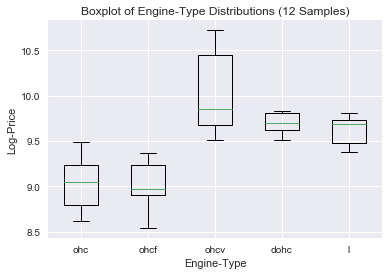


Statistics for F-Test between 5 Car Engine-Types (12 Samples)
## F-test statistic = 8.684776034001963
## P-value = 1.6562952168210297e-05

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 dohc    l    -0.1815  -0.6896  0.3266 False 
 dohc   ohc   -0.5929   -1.101 -0.0848  True 
 dohc   ohcf  -0.5998  -1.1079 -0.0918  True 
 dohc   ohcv   0.2601   -0.248  0.7682 False 
  l     ohc   -0.4114  -0.9195  0.0967 False 
  l     ohcf  -0.4183  -0.9264  0.0897 False 
  l     ohcv   0.4416  -0.0665  0.9497 False 
 ohc    ohcf   -0.007   -0.515  0.5011 False 
 ohc    ohcv   0.853    0.3449  1.3611  True 
 ohcf   ohcv   0.8599   0.3519  1.368   True 
---------------------------------------------


In [15]:
# Dropping categories with too few samples
df_enginetype = df[(df['engine-type'] != 'dohcv') & (df['engine-type'] != 'rotor')]

# Obtaining log price columns for the maximum # of samples
enginetype_sample = stratify_maxsamp(df_enginetype, 'engine-type')

enginetype_ohc_logprice = np.array(enginetype_sample.loc[enginetype_sample['engine-type'] == 'ohc', 'log-price'])
enginetype_ohcf_logprice = np.array(enginetype_sample.loc[enginetype_sample['engine-type'] == 'ohcf', 'log-price'])
enginetype_ohcv_logprice = np.array(enginetype_sample.loc[enginetype_sample['engine-type'] == 'ohcv', 'log-price'])
enginetype_dohc_logprice = np.array(enginetype_sample.loc[enginetype_sample['engine-type'] == 'dohc', 'log-price'])
enginetype_l_logprice = np.array(enginetype_sample.loc[enginetype_sample['engine-type'] == 'l', 'log-price'])

# Plotting Summary Boxplot
plt.boxplot([enginetype_ohc_logprice, enginetype_ohcf_logprice, enginetype_ohcv_logprice,
             enginetype_dohc_logprice, enginetype_l_logprice])
plt.ylabel('Log-Price')
plt.xlabel('Engine-Type')
plt.xticks([1, 2, 3, 4, 5], ['ohc', 'ohcf', 'ohcv', 'dohc', 'l'])
plt.title('Boxplot of Engine-Type Distributions (12 Samples)')
plt.show()


# Obtaining f-stat and p-value
f_stat, p_value = ss.f_oneway(enginetype_ohc_logprice, enginetype_ohcf_logprice,
                              enginetype_ohcv_logprice, enginetype_dohc_logprice, enginetype_l_logprice)

print('\nStatistics for F-Test between 5 Car Engine-Types (12 Samples)')
print(f'## F-test statistic = {f_stat}')
print(f'## P-value = {p_value}\n')


# Obtaining pairwise_tukeyhsd table
df_tukey = pd.DataFrame({'vals' : list(enginetype_ohc_logprice) + list(enginetype_ohcf_logprice) +
                              list(enginetype_ohcv_logprice) + list(enginetype_dohc_logprice) + list(enginetype_l_logprice),
                         'group': ['ohc'] * 12 + ['ohcf'] * 12 + ['ohcv'] * 12 + ['dohc'] * 12 + ['l'] * 12})

Tukey_HSD = pairwise_tukeyhsd(df_tukey.vals, df_tukey.group)
print(Tukey_HSD)

Significant differences were found between the log-price distributions of dohc v. ohc, l v. ohcv, ohc v. ohcv, and ohcf v. ohcv engine-types. Overall, cars with ohcv engine type tended to be far more expensive than cars with other engine-types. 

#### 4.D Num-of-Cylinders

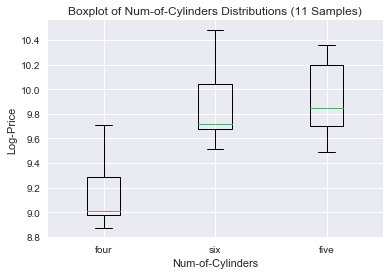


Statistics for F-Test between 3 Car Num-of-Cylinder Types (12 Samples)
## F-test statistic = 18.125511925071788
## P-value = 6.901284105716164e-06

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 five   four   -0.725  -1.0583 -0.3917  True 
 five   six   -0.0418   -0.375  0.2915 False 
 four   six    0.6832    0.35   1.0165  True 
---------------------------------------------


In [16]:
# Dropping categories with too few samples
df_numofcylinders = df[(df['num-of-cylinders'] == 'four') | (df['num-of-cylinders'] == 'six') | (df['num-of-cylinders'] == 'five')]

# Obtaining log price columns for the maximum # of samples
numofcylinders_sample = stratify_maxsamp(df_numofcylinders, 'num-of-cylinders')

numofcyl_four_logprice = np.array(numofcylinders_sample.loc[numofcylinders_sample['num-of-cylinders'] == 'four', 'log-price'])
numofcyl_six_logprice = np.array(numofcylinders_sample.loc[numofcylinders_sample['num-of-cylinders'] == 'six', 'log-price'])
numofcyl_five_logprice = np.array(numofcylinders_sample.loc[numofcylinders_sample['num-of-cylinders'] == 'five', 'log-price'])


# Plotting Summary Boxplot
plt.boxplot([numofcyl_four_logprice, numofcyl_six_logprice, numofcyl_five_logprice])
plt.ylabel('Log-Price')
plt.xlabel('Num-of-Cylinders')
plt.xticks([1, 2, 3], ['four', 'six', 'five'])
plt.title('Boxplot of Num-of-Cylinders Distributions (11 Samples)')
plt.show()


# Obtaining f-stat and p-value
f_stat, p_value = ss.f_oneway(numofcyl_four_logprice, numofcyl_six_logprice, numofcyl_five_logprice)

print('\nStatistics for F-Test between 3 Car Num-of-Cylinder Types (12 Samples)')
print(f'## F-test statistic = {f_stat}')
print(f'## P-value = {p_value}\n')


# Obtaining pairwise_tukeyhsd table
df_tukey = pd.DataFrame({'vals' : list(numofcyl_four_logprice) + list(numofcyl_six_logprice) + list(numofcyl_five_logprice),
                         'group': ['four'] * 11 + ['six'] * 11 + ['five'] * 11})

Tukey_HSD = pairwise_tukeyhsd(df_tukey.vals, df_tukey.group)
print(Tukey_HSD)

Significant differences were found between the log-price distributions of cars with five v. four cylinders and cars with four v. six cylinders. Cars with four cylinders tended to be far less expensive than cars with five or more cylinders.

#### 4.E Fuel-System

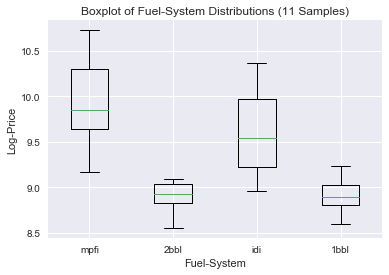


Statistics for F-Test between 4 Car Fuel-System Types (11 Samples)
## F-test statistic = 19.175462084596276
## P-value = 7.280037082378215e-08

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 1bbl   2bbl   0.0149  -0.4274 0.4572 False 
 1bbl   idi    0.6761   0.2339 1.1184  True 
 1bbl   mpfi   1.0343   0.5921 1.4766  True 
 2bbl   idi    0.6612   0.219  1.1035  True 
 2bbl   mpfi   1.0194   0.5771 1.4617  True 
 idi    mpfi   0.3582  -0.0841 0.8005 False 
--------------------------------------------


In [17]:
# Dropping categories with too few samples
df_fuelsystem = df[(df['fuel-system'] == 'mpfi') | (df['fuel-system'] == '2bbl') | (df['fuel-system'] == 'idi')
                   | (df['fuel-system'] == '1bbl')]

# Obtaining log price columns for the maximum # of samples
fuelsystem_sample = stratify_maxsamp(df_fuelsystem, 'fuel-system')

fuelsystem_mpfi_logprice = np.array(fuelsystem_sample.loc[fuelsystem_sample['fuel-system'] == 'mpfi', 'log-price'])
fuelsystem_2bbl_logprice = np.array(fuelsystem_sample.loc[fuelsystem_sample['fuel-system'] == '2bbl', 'log-price'])
fuelsystem_idi_logprice = np.array(fuelsystem_sample.loc[fuelsystem_sample['fuel-system'] == 'idi', 'log-price'])
fuelsystem_1bbl_logprice = np.array(fuelsystem_sample.loc[fuelsystem_sample['fuel-system'] == '1bbl', 'log-price'])

# Plotting Summary Boxplot
plt.boxplot([fuelsystem_mpfi_logprice, fuelsystem_2bbl_logprice, fuelsystem_idi_logprice, fuelsystem_1bbl_logprice])
plt.ylabel('Log-Price')
plt.xlabel('Fuel-System')
plt.xticks([1, 2, 3, 4], ['mpfi', '2bbl', 'idi', '1bbl'])
plt.title('Boxplot of Fuel-System Distributions (11 Samples)')
plt.show()


# Obtaining f-stat and p-value
f_stat, p_value = ss.f_oneway(fuelsystem_mpfi_logprice, fuelsystem_2bbl_logprice,
                              fuelsystem_idi_logprice, fuelsystem_1bbl_logprice)

print('\nStatistics for F-Test between 4 Car Fuel-System Types (11 Samples)')
print(f'## F-test statistic = {f_stat}')
print(f'## P-value = {p_value}\n')


# Obtaining pairwise_tukeyhsd table
df_tukey = pd.DataFrame({'vals' : list(fuelsystem_mpfi_logprice) + list(fuelsystem_2bbl_logprice)
                         + list(fuelsystem_idi_logprice) + list(fuelsystem_1bbl_logprice),
                         'group': ['mpfi'] * 11 + ['2bbl'] * 11 + ['idi'] * 11 + ['1bbl'] * 11})

Tukey_HSD = pairwise_tukeyhsd(df_tukey.vals, df_tukey.group)
print(Tukey_HSD)

Significant differences were found between the log-price distributions of cars with 1bbl v. idi, 1bbl v. mpfi, 2bbl v. idi, and 2bbl v. mpfi fuel system types. Cars with 2bbl or 1bbl fuel-types tended to be less expensive than cars with either idi or mpfi fuel-types.